In [2]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.lines as mlines

plt.rcParams.update({'font.size':16})

Don't open csv files in excel!!! If not numbers are going to get rounded up

## A simple plot

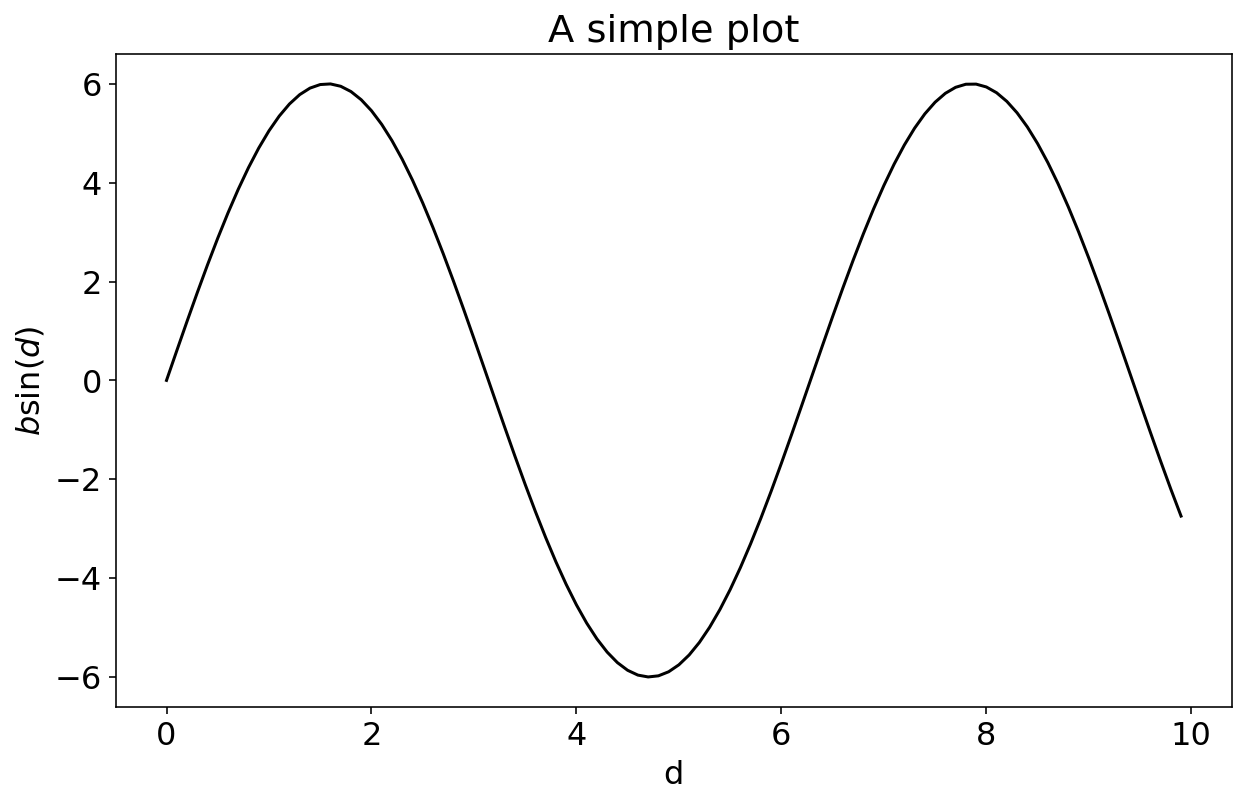

In [30]:
b = 6
d = np.arange(0,10,0.1)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(d, b*np.sin(d), color='k', linestyle='-')
ax.set_xlabel('d')
ax.set_ylabel('$b \sin(d)$')
ax.set_title('A simple plot')
plt.savefig("data/simpleplot.png")
plt.show()

## Plotting data

In [31]:
data = pd.read_csv('data/C4_Ohms_Fitting.csv')

In [32]:
data.head()

,V,I_mA,I_unc_mA
0,0.0,0,10
1,0.5,10,10
2,1.0,20,10
3,1.5,20,10
4,2.0,20,10


In [33]:
def line(x, slope, intercept):         
    return slope*x + intercept

In [34]:
popt, pcov = curve_fit(line, data['V'], data['I_mA'])
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [35]:
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Slope: 9.247 +- 0.297
Intercept: 4.719 +- 1.734


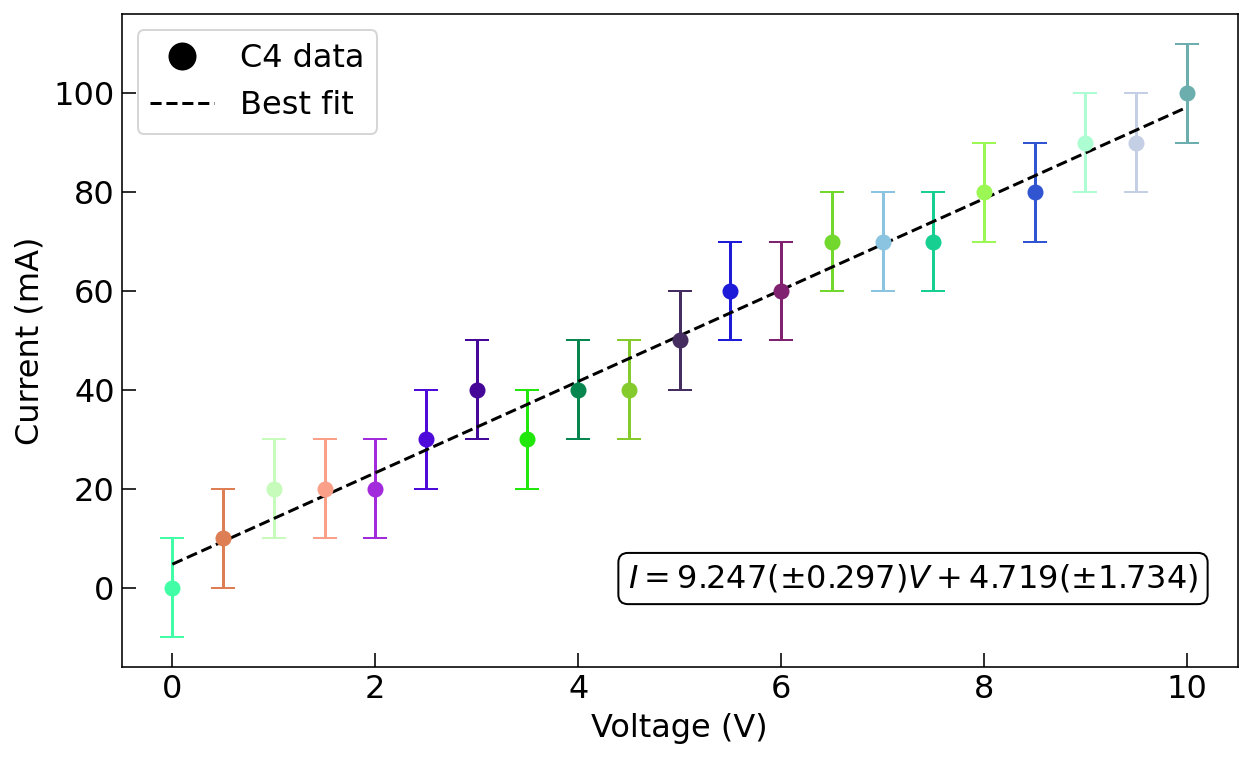

In [36]:
# https://matplotlib.org/2.0.2/users/legend_guide.html
col = np.random.rand(len(data['V']),3)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for x, y, err, c in zip(data['V'], data['I_mA'], data['I_unc_mA'], col):
    ax.errorbar(x, y, err,     
                 marker='o',             
                 markersize = 7,        
                 color=c,         
                 ecolor=c,        
                 markerfacecolor=c,
                 linestyle='none',       
                 capsize=6)

ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')
ax.tick_params(direction='in', length=7)

ax.plot(data['V'], data['V']*slope+intercept, linestyle='--', color='black')

black_circle = mlines.Line2D([0], [0], marker='o', color='w', label='C4 data', markerfacecolor='k', markersize=15)
black_line = mlines.Line2D([], [], color='black', linestyle='--', label='Best fit')
plt.legend(handles=[black_circle, black_line], loc=0)

annotation ='$I = {0:.3f} ( \pm {1:.3f})V {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(7.3, 0), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
fig.savefig('data/pretty_plot.pdf')
plt.show()

## More functions and saving to files

In [37]:
def fib_fn(n_terms, filename='data/fibonacci_results.txt'):
    fibonacci = np.zeros(n_terms)
    for n in range(n_terms):
        if n < 2:
            fibonacci[n] = 1
        else:
            fibonacci[n] = fibonacci[n-2] + fibonacci[n-1]
    n = np.arange(1,n_terms+1,1) ## getting our array so we can print the n values
    np.savetxt(filename, np.column_stack([n, fibonacci]), fmt="%10d",
               header='{:>10}, {:>10}'.format('n', 'Fibonacci'), delimiter=',')
    return(n, fibonacci)

fib_fn(5)

(array([1, 2, 3, 4, 5]), array([1., 1., 2., 3., 5.]))

## Exercises

### 1. Distances

In [38]:
def mu_to_d(mu):
    d = 10**((mu + 5.)/5.)
    return(d)

def d_to_mu(d):
    mu = 5. * np.log10(d) - 5.
    return(mu)

d_lmc = mu_to_d(18.5)
d_lmc_kpc = d_lmc / 1000.
print("d = {0:.2f} kpc".format(d_lmc_kpc))

mu_andromeda = d_to_mu(778 * 1000)
print("mu = {0:.2f} mag".format(mu_andromeda))

def abs_mag(app_mag, mu):
    abs_mag = app_mag - mu
    return(abs_mag)

abs_mag_andromeda = abs_mag(3.4, mu_andromeda)
print("M = {0:.2f}".format(abs_mag_andromeda))

d = 50.12 kpc
mu = 24.45 mag
M = -21.05


### 2. The central limit theorem

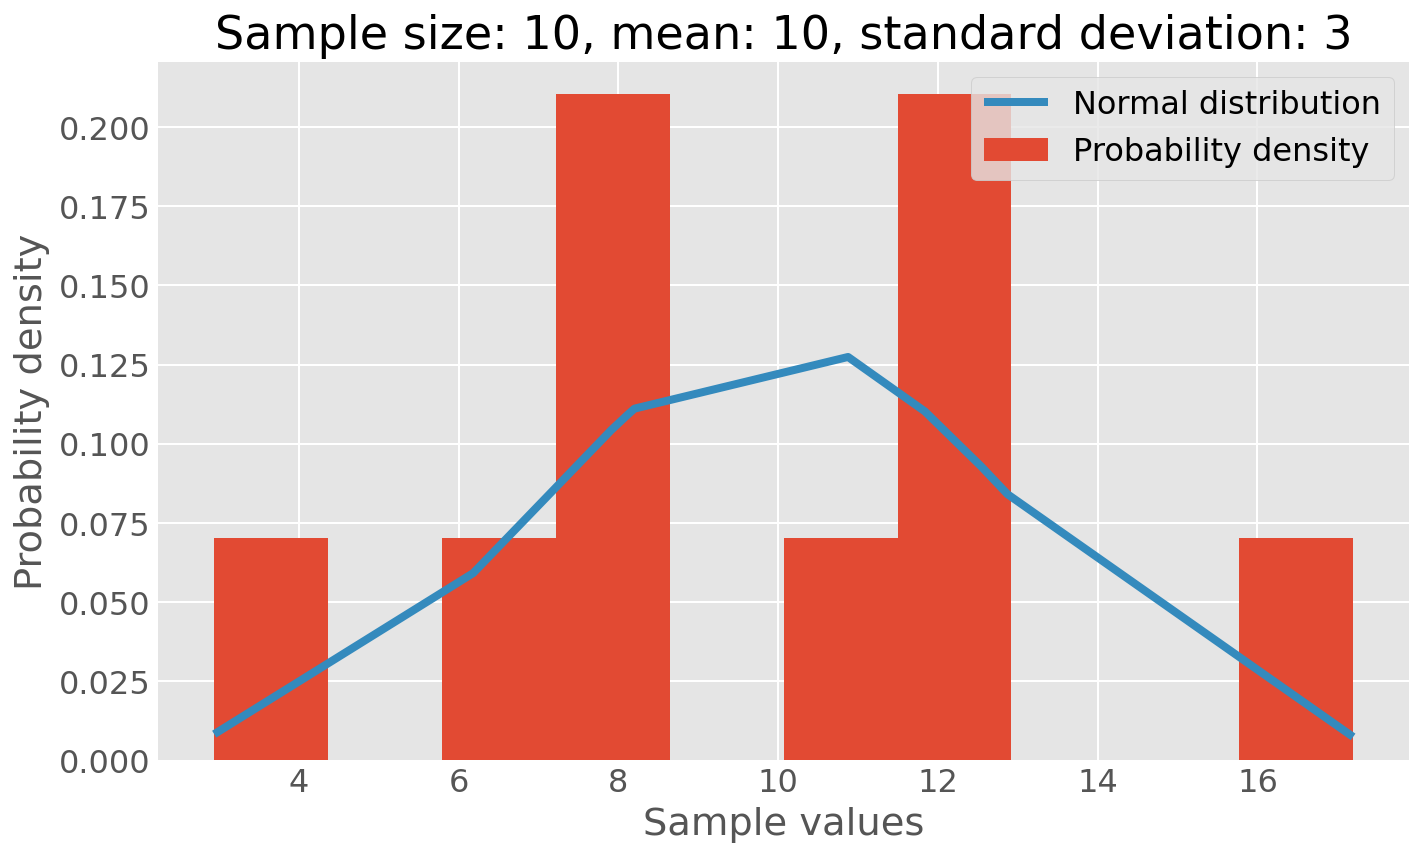

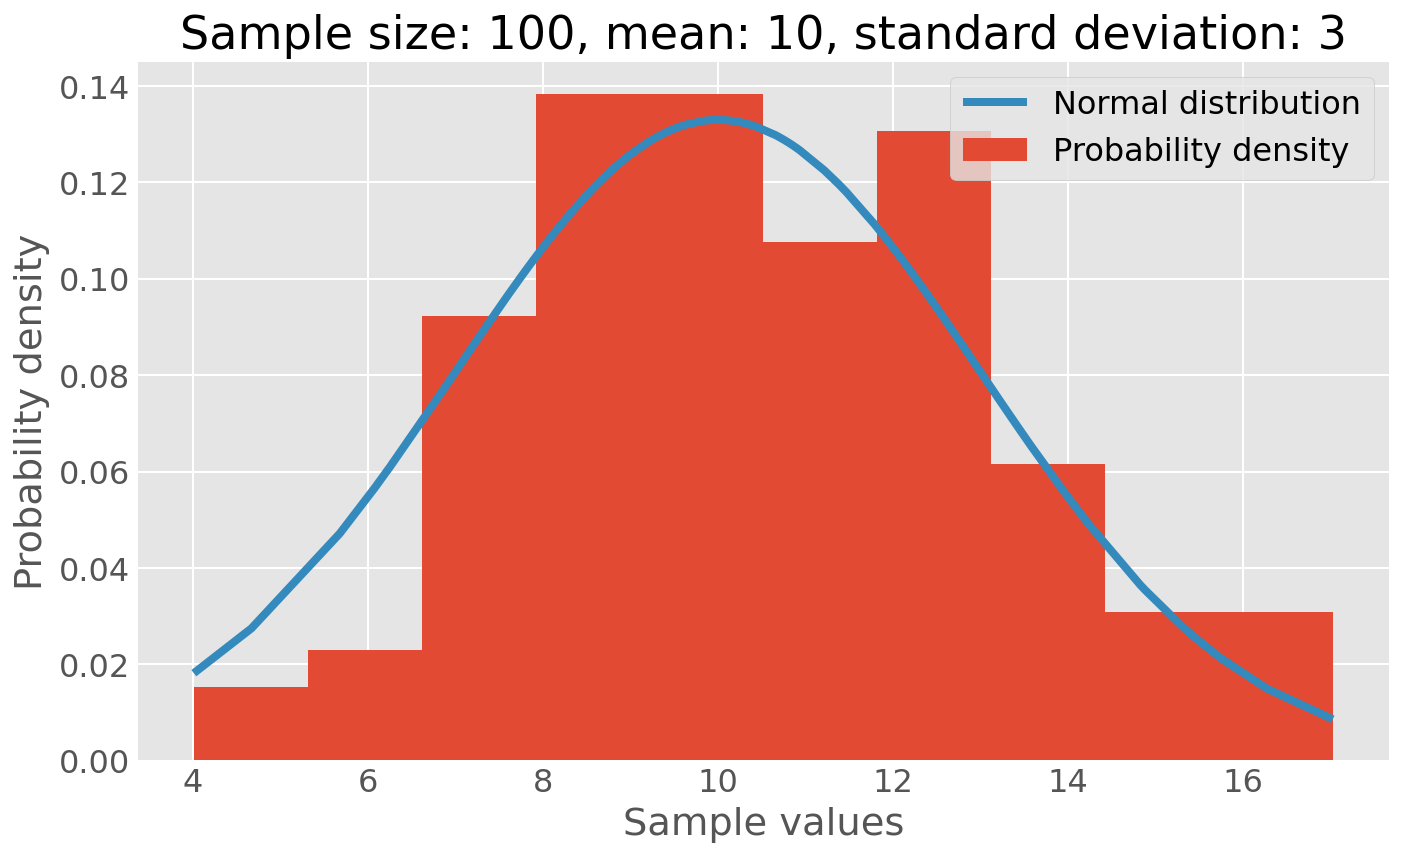

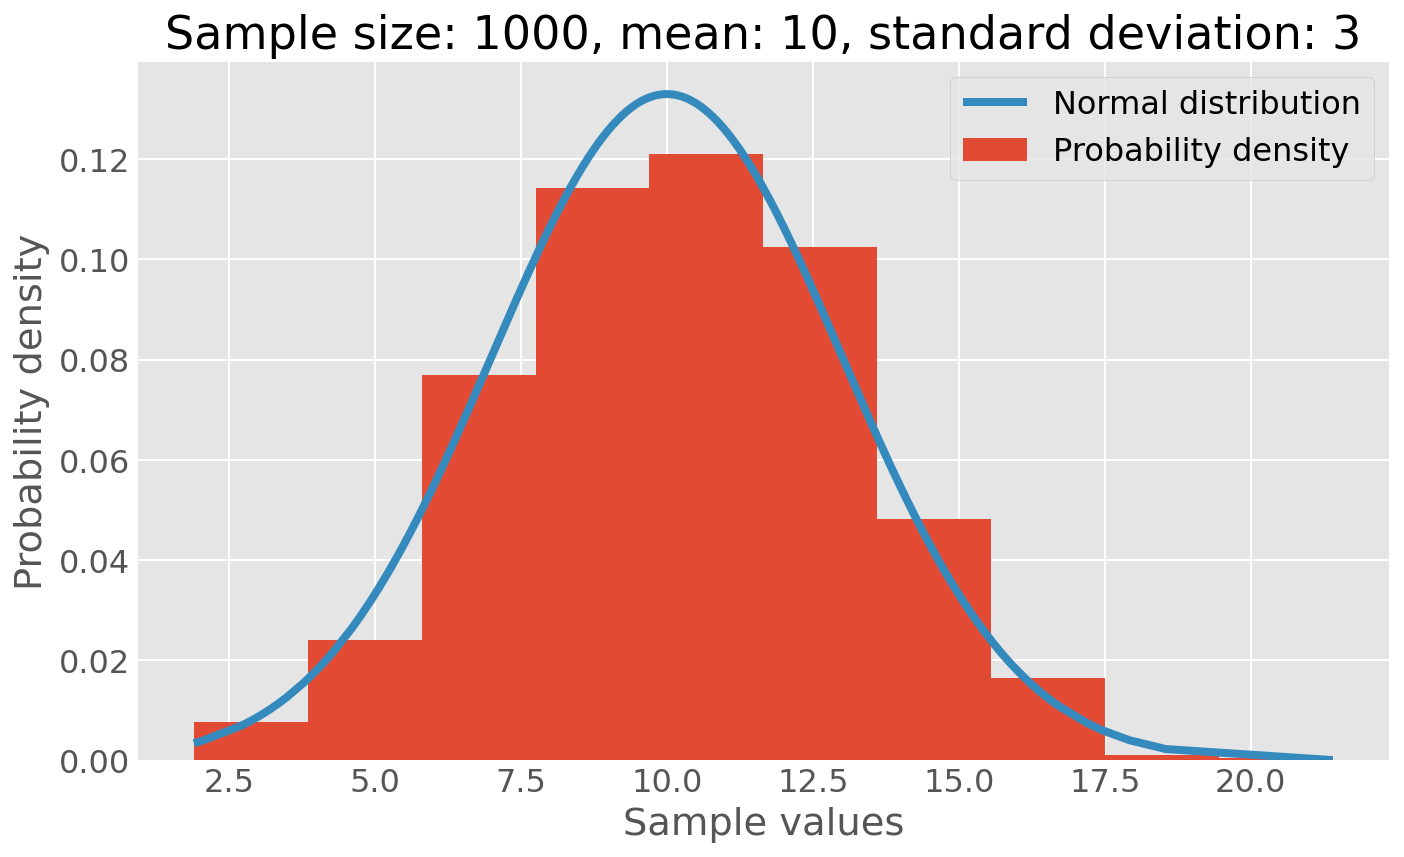

In [37]:
def normal_distribution(mu, sigma, x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

def normal_plot(n, mu, sigma):
    x = np.random.normal(mu, sigma, n)
    counts, bins = np.histogram(x)
    plt.style.use('ggplot')
    %config InlineBackend.figure_format = 'retina'
    plt.rcParams.update({'font.size':16})
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)
    ax.hist(bins[:-1], bins, weights=counts, density=True, label='Probability density')
    ax.plot(np.sort(x), normal_distribution(mu, sigma, np.sort(x)), label='Normal distribution')
    ax.set_title('Sample size: {0}, mean: {1}, standard deviation: {2}'.format(n, mu, sigma))
    ax.set_xlabel('Sample values')
    ax.set_ylabel('Probability density')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
    plt.show()

normal_plot(10, mu, sigma)
normal_plot(100, mu, sigma)
normal_plot(1000, mu, sigma)

The results make sense because as the sample size gets bigger, the histogram should start looking more like a normal distribution, as stated by the Central Limit Theorem.

### 3. Pulse on a wire

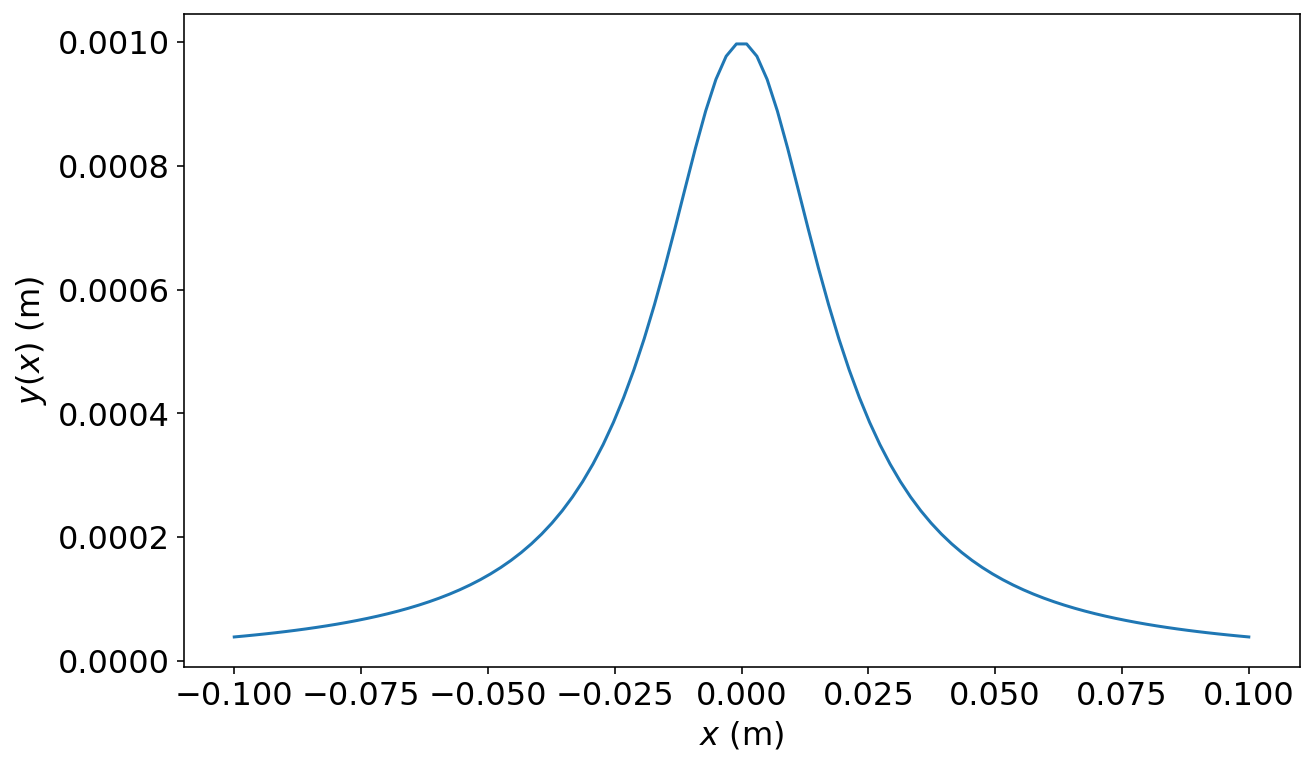

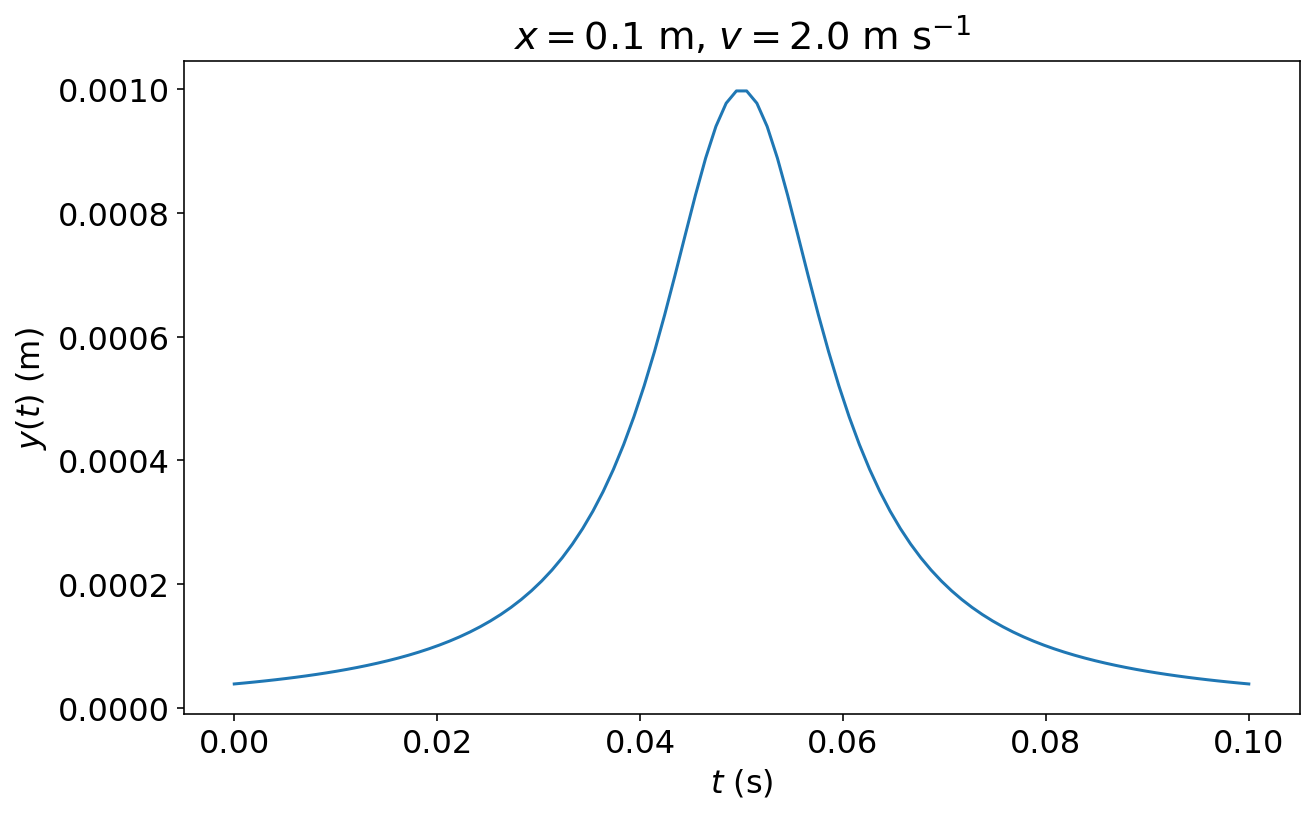

In [39]:
def pulse(x):
    y = (4e-3) / ((100 * x)**2 + 4)
    return(y)
x = np.linspace(-0.1, 0.1, 100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, pulse(x))
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$y(x)$ (m)')

def displacement(x, t, v):
    y = (4e-3) / ((100 * (x - v*t))**2 + 4)
    return(y)

t = np.linspace(0, 0.1, 100)
x_0 = 0.1
v = 2
fig = plt.figure(figsize=(10,6))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(t, displacement(x_0, t, v))
ax2.set_xlabel('$t$ (s)')
ax2.set_ylabel('$y(t)$ (m)')
title_string = '$x = {0:.1f}$ m, $v = {1:.1f}$ m s$^{{-1}}$'.format(x_0, v)
ax2.set_title(title_string)
plt.show()

### 4. Estimating _g_

In [40]:
data_2 = pd.read_csv('data/data_2.csv')
data_2.head()

,Time_s,Height_m,Unc_m
0,0.0,182.0,3.5
1,0.5,180.0,4.5
2,1.0,178.0,4.0
3,1.5,165.0,5.5
4,2.0,160.0,2.5


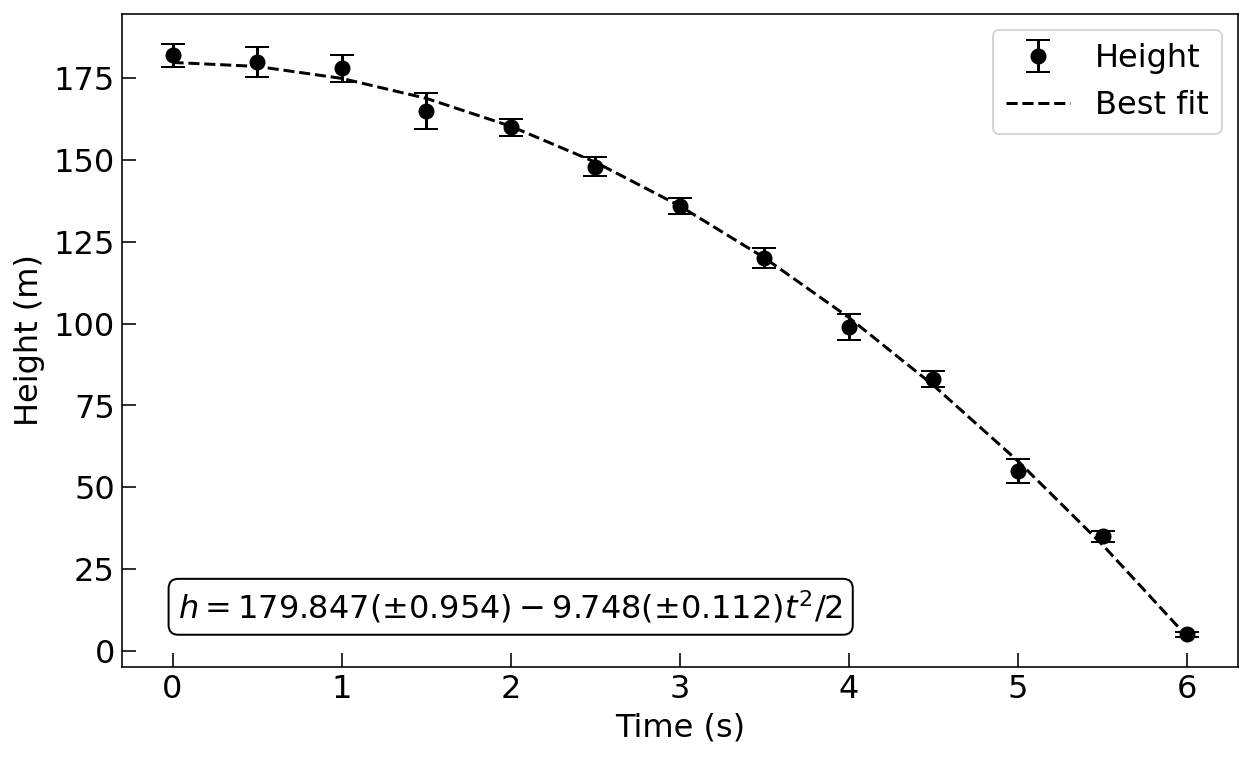

g = (-9.748 +- 0.112) m/s^2


In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data_2['Time_s'], data_2[' Height_m'],
            yerr = data_2[' Unc_m'],             
            marker='o',             
            markersize = 7,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,
            label='Height')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (m)')

ax.tick_params(direction='in', length=7)

def curve(x, g, intercept):         
    return 0.5*g*np.array(x)**2 + intercept

popt_2, pcov_2 = curve_fit(curve, data_2['Time_s'], data_2[' Height_m'])
g = popt_2[0]
intercept = popt_2[1]
err_g = np.sqrt(float(pcov_2[0][0]))
err_intercept = np.sqrt(float(pcov_2[1][1]))

ax.plot(data_2['Time_s'], 0.5*g*np.array(data_2['Time_s'])**2 + intercept, 
         linestyle='--',
         color='black',
         label='Best fit')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
annotation ='$h = {0:.3f} ( \pm {1:.3f}) {2:.3f} ( \pm {3:.3f})t^2/2$'.format(intercept, err_intercept, g, err_g)
ax.annotate(annotation, xy=(2, 10), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))

plt.savefig('data/g_plot.pdf')
plt.show()
print('g = ({0:.3f} +- {1:.3f}) m/s^2'.format(g, err_g))